## Импорт библиотек

In [226]:
import numpy as np
from random import randrange
import csv

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Создание "качественных" наборов данных

In [227]:
def create_dataset(seed=42, noise=False):
  np.random.seed(seed)

  x = np.linspace(0, 10, 100)
  y = x + np.random.random(100) * 2 - 1

  if noise:
      y[25:45] *= 2

  return x, y


x1, y1 = create_dataset()
x2, y2 = create_dataset()
x3, y3 = create_dataset()

## Создание набора данных с шумом

In [228]:
x4, y4 = create_dataset(noise=True)

# Обучение модели на "качественном" наборе данных

In [229]:
X_train_quality = x2.reshape(-1, 1)
Y_train_quality = y2

model_quality = LinearRegression()
model_quality.fit(X_train_quality, Y_train_quality)

Y_pred_quality = model_quality.predict(X_train_quality)

In [230]:
with open("model_quality.csv", "w+", newline='') as f:
    writer = csv.writer(f)
    writer.writerow([model_quality.coef_[0], model_quality.intercept_])

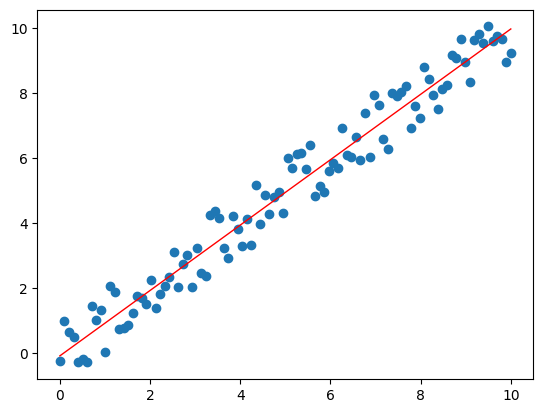

In [231]:
plt.scatter(X_train_quality, Y_train_quality)
plt.plot(X_train_quality, Y_pred_quality, color='red', linewidth=1)
plt.show()

In [232]:
print(model_quality.coef_[0], model_quality.intercept_)

1.0040984640489807 -0.08013083348848582


# Обучение модели на наборе данных с шумом

In [233]:
X_train_noise = x4.reshape(-1, 1)
Y_train_noise = y4

model_noise = LinearRegression()
model_noise.fit(X_train_noise, Y_train_noise)

Y_pred_noise = model_noise.predict(X_train_noise)

In [234]:
with open("model_noise.csv", "w+", newline='') as f:
    writer = csv.writer(f)
    writer.writerow([model_noise.coef_[0], model_noise.intercept_])

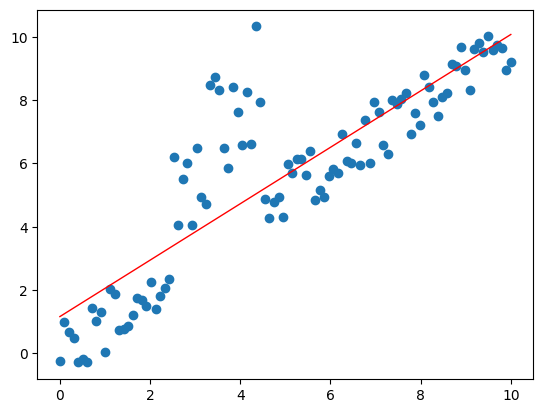

In [235]:
plt.scatter(X_train_noise, Y_train_noise)
plt.plot(X_train_noise, Y_pred_noise, color='red', linewidth=1)
plt.show()

In [236]:
print(model_noise.coef_[0], model_noise.intercept_)

0.8906094750144905 1.1652910107286036


# Тестирование кода

In [239]:
%%writefile test_models.py

import csv

def test_first_quality_model():
     expected_x = 1.0040984640489807 
     expected_y = -0.08013083348848582

     with open('model_quality.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_first_noise_model():
     expected_x = 1.0040984640489807 
     expected_y = -0.08013083348848582

     with open('model_noise.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_second_quality_model():
     expected_x = 0.8906094750144905 
     expected_y = 1.1652910107286036

     with open('model_quality.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_second_noise_model():
     expected_x = 0.8906094750144905 
     expected_y = 1.1652910107286036

     with open('model_noise.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

Overwriting test_models.py


In [240]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0
rootdir: /content
plugins: anyio-3.6.2
collected 4 items                                                              

test_models.py .FF.                                                      [100%]

=================================== FAILURES ===================================
____________________________ test_first_noise_model ____________________________

    def test_first_noise_model():
         expected_x = 1.0040984640489807
         expected_y = -0.08013083348848582
    
         with open('model_noise.csv', newline='') as file:
             reader = csv.reader(file)
             row = next(reader)
             x, y = map(float, row)
    
>        assert x == expected_x
E        assert 0.8906094750144905 == 1.0040984640489807

test_models.py:24: AssertionError
__________________________ test_second_quality_model _______________________